In [166]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os


# process load time data
systems = ['dlcache', 'baseline']

data = []
for system in systems:
    for run in range(1, 6):
        dirs = glob.glob("{}/data/run{}/*".format(system, run))
        for dir in dirs:
            try:
                compute_time = float(dir.split('/')[-1])
                load_time = np.load('{}/load_time.npy'.format(dir))[0]
                if os.path.exists('{}/train_cache_usage.npy'.format(dir)):
                    avg_cache_usage = np.load('{}/train_cache_usage.npy'.format(dir))
                    avg_cache_usage = np.mean(avg_cache_usage, dtype=int)
                    cache_hits = 0
                    for ch in glob.glob("{}/cache_hits*".format(dir)):
                        cache_hits += np.load(ch)
                    cache_hit_rate = cache_hits / (512 * 50)
                else:
                    avg_cache_usage = 0
                    cache_hit_rate = 0

                data.append([system, compute_time, load_time, avg_cache_usage, cache_hit_rate])
            except:
                pass

data = pd.DataFrame(data, columns=['system', 'compute_time', 'load_time', 'avg_cache_usage', 'cache_hit_rate'])
data.sort_values(by='compute_time', inplace=True)
data

,system,compute_time,load_time,avg_cache_usage,cache_hit_rate
41,baseline,0.4,378.108361,0,0.000000
35,baseline,0.4,383.296390,0,0.000000
29,baseline,0.4,378.349254,0,0.000000
5,dlcache,0.4,354.285695,2367,0.788164
23,baseline,0.4,378.615215,0,0.000000
17,baseline,0.4,405.761556,0,0.000000
11,dlcache,0.4,346.505800,3726,0.534414
38,baseline,1.2,337.616251,0,0.000000
32,baseline,1.2,338.824694,0,0.000000
26,baseline,1.2,338.560625,0,0.000000


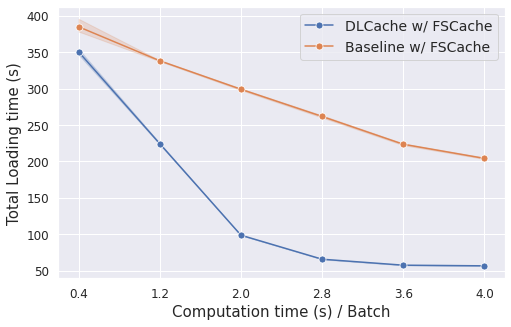

In [167]:
compute_time = data['compute_time'].unique().tolist()
sns.set(style='darkgrid',)
sns.set(rc={'figure.figsize':(8, 5)})

for system in systems:
    slice = data[data['system']==system].sort_values(by='compute_time')
    compute_time_ticks = []
    for ct in slice['compute_time']:
        compute_time_ticks.append(compute_time.index(ct))
    slice['compute_time'] = compute_time_ticks
    if len(slice) > 0:
        if system == 'dlcache':
            label = 'DLCache w/ FSCache'
        else:
            label = 'Baseline w/ FSCache'
            
        sns.lineplot(x='compute_time', y='load_time', data=slice, label=label, marker= '.', markersize=14)

plt.xticks(np.arange(len(compute_time)), compute_time, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Computation time (s) / Batch', fontsize = 15)
plt.ylabel('Total Loading time (s)', fontsize = 15)
plt.legend(fontsize=14)
plt.show()

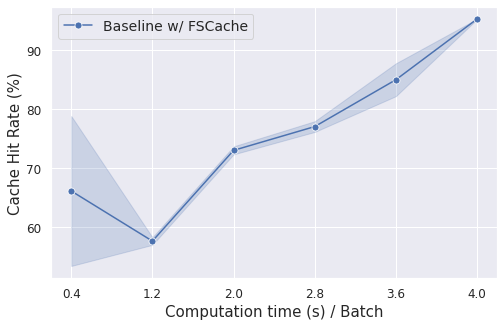

In [168]:

slice = data[(data['system']=='dlcache')].sort_values(by='compute_time')
compute_time_ticks = []
for ct in slice['compute_time']:
    compute_time_ticks.append(compute_time.index(ct))
slice['compute_time'] = compute_time_ticks
slice['cache_hit_rate'] *= 100.0
if len(slice) > 0:
    ilabel = 'DLCache w/ FSCache'
    sns.lineplot(x='compute_time', y='cache_hit_rate', data=slice, label=label, marker= '.', markersize=14)

plt.xticks(np.arange(len(compute_time)), compute_time, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Computation time (s) / Batch', fontsize = 15)
plt.ylabel('Cache Hit Rate (%)', fontsize = 15)
plt.legend(fontsize=14)
plt.show()